/opt/anaconda3/envs/MLDyn/lib/python3.12/site-packages/galpy/orbit/Orbits.py:1458: galpyWarningVerbose: Using C implementation to integrate orbits
  warnings.warn(


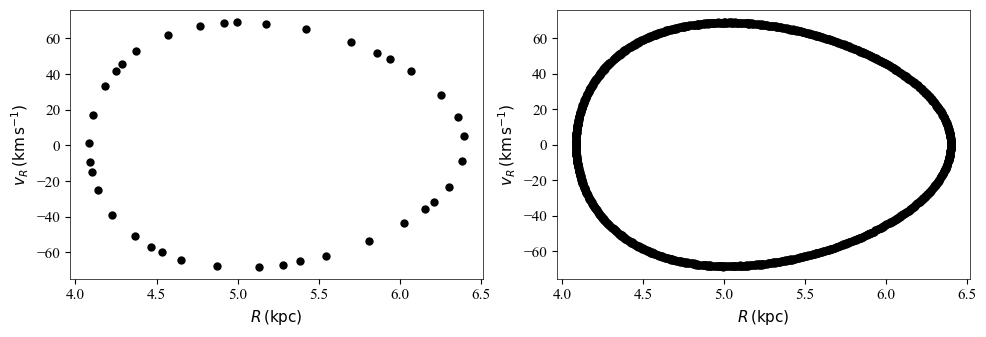

In [42]:
from galpy import potential
from galpy.orbit import Orbit
import numpy
import matplotlib.pyplot as plt
def orbit_RvRELz(R,vR,E,Lz,pot=None):
    """Returns Orbit at (R,vR,phi=0,z=0) with given (E,Lz)"""
    return Orbit([R,vR,Lz/R,0.,
                  numpy.sqrt(2.*(E-potential.evaluatePotentials(pot,R,0.)
                                 -(Lz/R)**2./2.-vR**2./2)),0.],ro=8.,vo=220.)
def surface_section(Rs,zs,vRs):
    # Find points where the orbit crosses z from - to +
    shiftzs= numpy.roll(zs,-1)
    indx= (zs[:-1] < 0.)*(shiftzs[:-1] > 0.)
    return (Rs[:-1][indx],vRs[:-1][indx])
R, E, Lz= 0.8, -1.25, 0.6
vR= 0.
o= orbit_RvRELz(R,vR,E,Lz,pot=potential.MWPotential2014)
ts= numpy.linspace(0.,100.,10001)
o.integrate(ts,potential.MWPotential2014)
sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.plot(sect1Rs,sect1vRs,'o',mec='none')
plt.xlabel(r'$R\,(\mathrm{kpc})$')
plt.ylabel(r'$v_R\,(\mathrm{km\,s}^{-1})$')
plt.subplot(1,2,2)
ts= numpy.linspace(0.,3000.,300001)
o.integrate(ts,potential.MWPotential2014)
sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
plt.plot(sect1Rs,sect1vRs,'o',mec='none')
plt.xlabel(r'$R\,(\mathrm{kpc})$')
plt.ylabel(r'$v_R\,(\mathrm{km\,s}^{-1})$')
plt.tight_layout(w_pad=0.4);

In [23]:
from galpy.potential import MWPotential2014, evaluatePotentials, plotEscapecurve, vesc
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

In [10]:
evaluatePotentials(
    MWPotential2014, 1, 0)

np.float64(-1.3733506513947897)

Text(0, 0.5, 'Potential (km^2/s^2)')

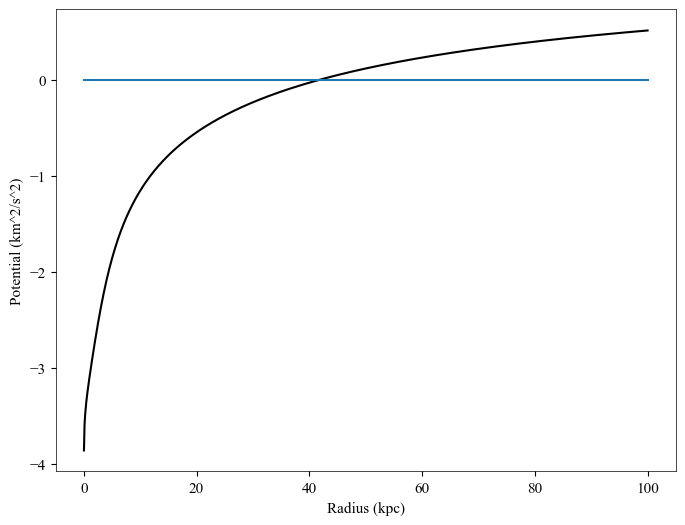

In [13]:
r_list = np.linspace(0.01, 100, 1000)*u.kpc
plt.plot(r_list, evaluatePotentials(MWPotential2014, r_list, 0))
plt.plot(r_list, np.zeros_like(r_list))
plt.xlabel('Radius (kpc)')
plt.ylabel('Potential (km^2/s^2)')

In [37]:
ves = vesc(MWPotential2014, np.linspace(0.001, 100, 1000)*u.kpc, use_physical=True)

/opt/anaconda3/envs/MLDyn/lib/python3.12/site-packages/galpy/util/conversion.py:1010: UserWarning: Returning output(s) in internal units even though use_physical=True, because ro and/or vo not set
  warnings.warn(


Text(0, 0.5, 'Escape velocity (km/s)')

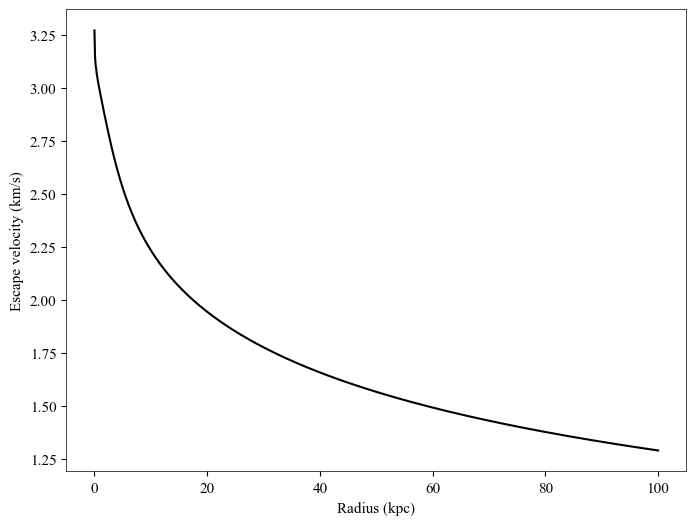

In [38]:
#plotEscapecurve(MWPotential2014, Rrange=np.array([0.001, 100]))
plt.plot(np.linspace(0.01, 100, 1000)*u.kpc, ves)
plt.xlabel('Radius (kpc)')
plt.ylabel('Escape velocity (km/s)')

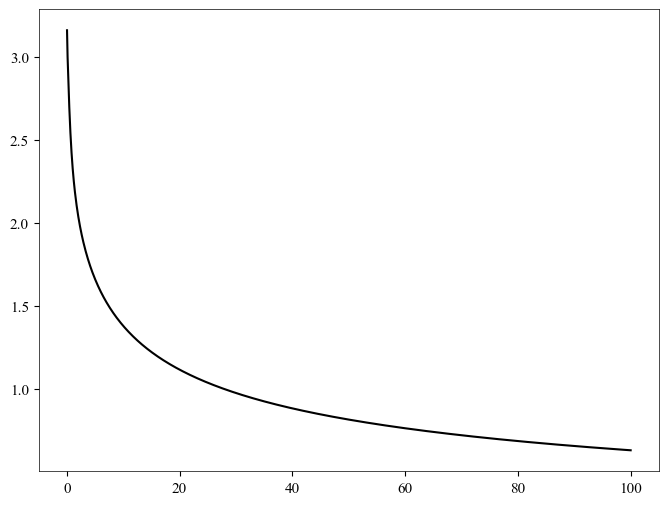

# Euler versus RK4

In [ ]:
from galpy.potential import IsothermalDiskPotential
pot = IsothermalDiskPotential()
euler = Orbit([1, 0])
euler.integrate(np.linspace(0, 1, 100), pot, method='euler')